In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas

import warnings
warnings.filterwarnings('ignore')

In [2]:
red_wine_df = pd.read_csv("Resources/winequality-red.csv", sep=";")
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_wine_df = pd.read_csv("Resources/winequality-white.csv", sep=";")
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red_wine_df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [5]:
white_wine_df.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

In [6]:
red_grouped = red_wine_df.groupby("quality")["fixed acidity"].mean()
red_grouped.head()

quality
3    8.360000
4    7.779245
5    8.167254
6    8.347179
7    8.872362
Name: fixed acidity, dtype: float64

In [7]:
red_grouped.hvplot.line()

:Curve   [quality]   (fixed acidity)

In [8]:
alcohol_grouped = red_wine_df.groupby("quality")["alcohol"].mean()
alcohol_grouped.hvplot.line()

:Curve   [quality]   (alcohol)

In [9]:
corr_df = red_wine_df.corr()

In [10]:
import seaborn as sns

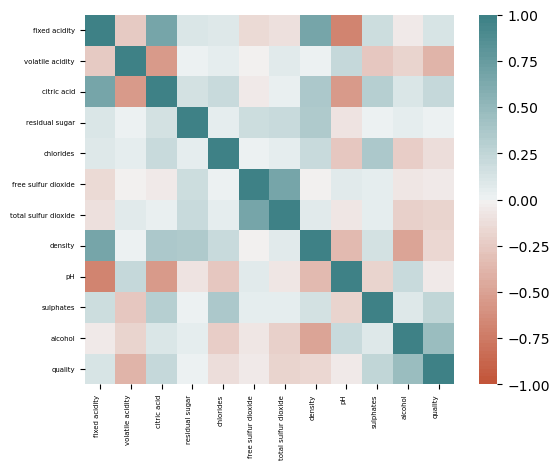

In [11]:
# plot a heat matrix
ax = sns.heatmap(corr_df,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, sep=1, n=100, l=50),
    square=True,
    xticklabels=True,
    yticklabels=True)

ax.set_yticklabels(ax.get_yticklabels(),fontsize=5);

ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=5,
    horizontalalignment='right'
  
);

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:

X = red_wine_df.drop('quality', axis=1)
y = red_wine_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [18]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R^2): {r2}")

Mean Absolute Error: 0.5035304415524374
Mean Squared Error: 0.3900251439639543
R-squared (R^2): 0.40318034127962277


#red wine quality: r^2 value with a value of 0.4032 suggest that there is a significant amount of unexplained variance with linear regression. maybe a different model?